In [1]:
import requests
import pandas as pd
import numpy as np
import urllib.request
import csv
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpld3
from sklearn.cluster import KMeans
from sklearn import datasets
from bs4 import BeautifulSoup
from docx import Document
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.palettes import Category10
import plotly.express as px

In [2]:
# Copying data from NCDC Website proved difficult because it appears the website
# is no longer functional. So to overcome that, I copied the document version
# from the data saved on the website and converted that into the dataframe dff.

doc = Document("C:\\Users\\ogbo9\\Documents\\Source Code\\NCDC Covid19 Data.docx")

# Extract the data from tables
data = []
header = None
for table in doc.tables:
    for i, row in enumerate(table.rows):
        if i == 0:  # First row is the header
            header = [cell.text for cell in row.cells]
        else:
            row_data = [cell.text for cell in row.cells]
            data.append(row_data)

# Create a dataframe with the extracted data and header
Nigera_NCDC_Data = pd.DataFrame(data, columns=header)

In [3]:
# Importing data from John Hopkins. I have used j moniker to differentiate.
urlj = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
response = requests.get(urlj)
soup = BeautifulSoup(response.text, 'html.parser')

John_Hopkins_confirmed_global = pd.read_csv(urlj)

In [4]:
urlj1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
John_Hopkins_recovered_global = pd.read_csv(urlj1)

In [5]:
urlj2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
John_Hopkins_deaths_global =pd.read_csv(urlj2)

In [6]:
urlu = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv"
Nigeria_covid_external = pd.read_csv(urlu)

In [7]:
urlu1 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covidnig.csv"
Nigeria_covidnig_data = pd.read_csv(urlu1)

In [8]:
urlu2 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv"
Nigeria_budget_data = pd.read_csv(urlu2)

In [9]:
urlu3 = "https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv"
Nigeria_realGDP = pd.read_csv(urlu3)

In [10]:
# Then I used the standard .head() and .info() functions to check the data copied.

Nigeria_covidnig_data.head(2)

States Affected No. of Cases (Lab Confirmed) No. of Cases (on admission)  \
0           Lagos                       26,708                       2,435   
1             FCT                        9,627                       2,840   

  No. Discharged  No. of Deaths  
0         24,037            236  
1          6,694             93

In [11]:
Nigeria_covidnig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [12]:
# To Clean the data from the NCDC website to remove comma.

columns = ['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']

for col in columns:
    Nigera_NCDC_Data[col] = Nigera_NCDC_Data[col].astype(str) 
    
columns = ['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']

for col in columns:
    Nigera_NCDC_Data[col] = Nigera_NCDC_Data[col].str.replace(',', '')
    Nigera_NCDC_Data[col] = pd.to_numeric(Nigera_NCDC_Data[col])

In [13]:
# To rename the columns in Nigera_NCDC_Data for easy entry.

Nigera_NCDC_Data.rename(columns={'No. of Cases (Lab Confirmed)': 'Cases', 
                    'No. of Cases (on admission)': 'Hospitalized', 
                    'No. Discharged': 'Discharged', 
                    'No. of Deaths': 'Deaths'}, inplace=True)


In [14]:
# To call the column names to ensure the change is done.
column_names = Nigera_NCDC_Data.columns.tolist()

# Print the column names
print(column_names)

['States Affected', 'Cases', 'Hospitalized', 'Discharged', 'Deaths']


In [15]:
# To extract data for Nigeria in the John Hopkins
# Repository, I first joined the extracted dfs in a new df, John_Hopkins_merged_global.

John_Hopkins_merged_global = pd.concat([John_Hopkins_confirmed_global, John_Hopkins_recovered_global, John_Hopkins_deaths_global])

In [16]:
# Then from John_Hopkins_merged_global I extract all data on Nigeria and named it John_Hopkins_Nigeria_data.

John_Hopkins_Nigeria_data = John_Hopkins_merged_global[John_Hopkins_merged_global['Country/Region'] == 'Nigeria']

In [17]:
# Create and replace with desired row names.

new_row_names = ['Infections', 'Discharged', 'Deaths']  

# Update the row names
John_Hopkins_Nigeria_data.index = new_row_names

# Print the updated dataframe
# print(John_Hopkins_Nigeria_data)

In [18]:
# To call the new row names
row_names = John_Hopkins_Nigeria_data.index.tolist()

# Print the row names
print(row_names)

['Infections', 'Discharged', 'Deaths']


In [19]:
# Using DataFrame from NCDC website I named 'Nigera_NCDC_Data' I want to plot the top ten rows based on the values in the column 'Cases'
top_ten = Nigera_NCDC_Data.nlargest(10, 'Cases')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Cases')

# Show the plot
plt.show()

In [20]:
# Using DataFrame from NCDC website I named 'Nigera_NCDC_Data' I want to plot the top ten rows based on the values in the column 'Discharged'
top_ten = Nigera_NCDC_Data.nlargest(10, 'Discharged')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Discharged')

# Show the plot
plt.show()

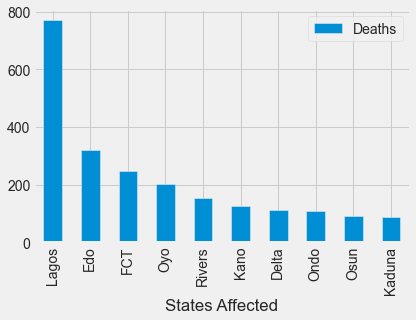

In [21]:
# Using DataFrame from NCDC website I named 'Nigera_NCDC_Data' I want to plot the top ten rows based on the values in the column 'Deaths'
top_ten = Nigera_NCDC_Data.nlargest(10, 'Deaths')

# Create a bar plot
top_ten.plot(kind='bar', x='States Affected', y='Deaths')

# Show the plot
plt.show()

In [22]:
rows_to_plot = ['Infections', 'Discharged', 'Deaths']

# Remove the first four columns because they are not numeric
John_Hopkins_Nigeria_data = John_Hopkins_Nigeria_data.iloc[:, 4:]

# Create a new figure with a specific size (width=10, height=6)
plt.figure(figsize=(15, 10))

# To plot the selected rows
for row in rows_to_plot:
    plt.plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc[row])

# Customize the chart
plt.legend(rows_to_plot)
plt.xlabel('Daily')
plt.ylabel('Rates (Log Scale)')
plt.title('Nigeria Covid19')

# Use a logarithmic scale for the y-axis
plt.yscale('log')

plt.show()


In [23]:
# Select the rows I want to plot the Nigeria John Hopkins extract
rows_to_plot = ['Infections', 'Discharged', 'Deaths']  

# Remove the first four columns because they are not numeric
John_Hopkins_Nigeria_data = John_Hopkins_Nigeria_data.iloc[:, 4:]

# To plot the selected rows
for row in rows_to_plot:
    plt.plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc[row])

# Customize the chart
plt.legend(rows_to_plot)  
plt.xlabel('Daily')  
plt.ylabel('Rates')  
plt.title('Nigeria Covid19')  



plt.show()

# Realised that the death plot flatlined when I used the above.

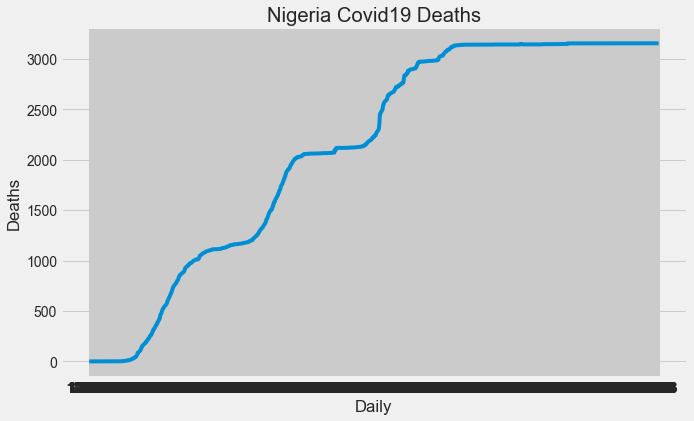

In [24]:
# So I ploted it separately to be sure.
# Create a new figure with a specific size (width=10, height=6)
plt.figure(figsize=(10, 6))
plt.plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc['Deaths'])
plt.xlabel('Daily')  
plt.ylabel('Deaths')  
plt.title('Nigeria Covid19 Deaths')  
plt.show()

<Figure size 1080x720 with 0 Axes>

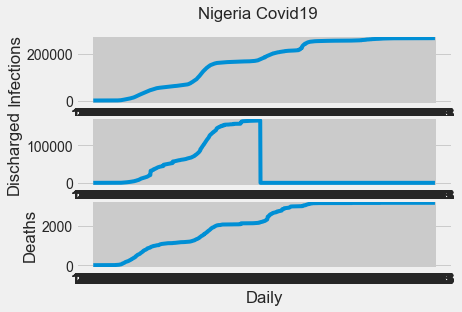

In [25]:
# And used sub-plots to get a better plot view.
# Create a new figure with a specific size (width=10, height=6)
plt.figure(figsize=(15, 10))

fig, axs = plt.subplots(3)
fig.suptitle('Nigeria Covid19')
axs[0].plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc['Infections'])
axs[0].set(ylabel='Infections')
axs[1].plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc['Discharged'])
axs[1].set(ylabel='Discharged')
axs[2].plot(John_Hopkins_Nigeria_data.columns, John_Hopkins_Nigeria_data.loc['Deaths'])
axs[2].set(xlabel='Daily', ylabel='Deaths')
plt.show()

In [26]:
# Plotting line chart for each row
fig = px.line(John_Hopkins_Nigeria_data, x=John_Hopkins_Nigeria_data.columns, y=John_Hopkins_Nigeria_data.index, title='Nigeria Covid19')

# Adding interactivity
fig.update_layout(
    xaxis_title='Rates',
    yaxis_title='Daily',
    hovermode='closest'
)

# Display the plot
fig.show()

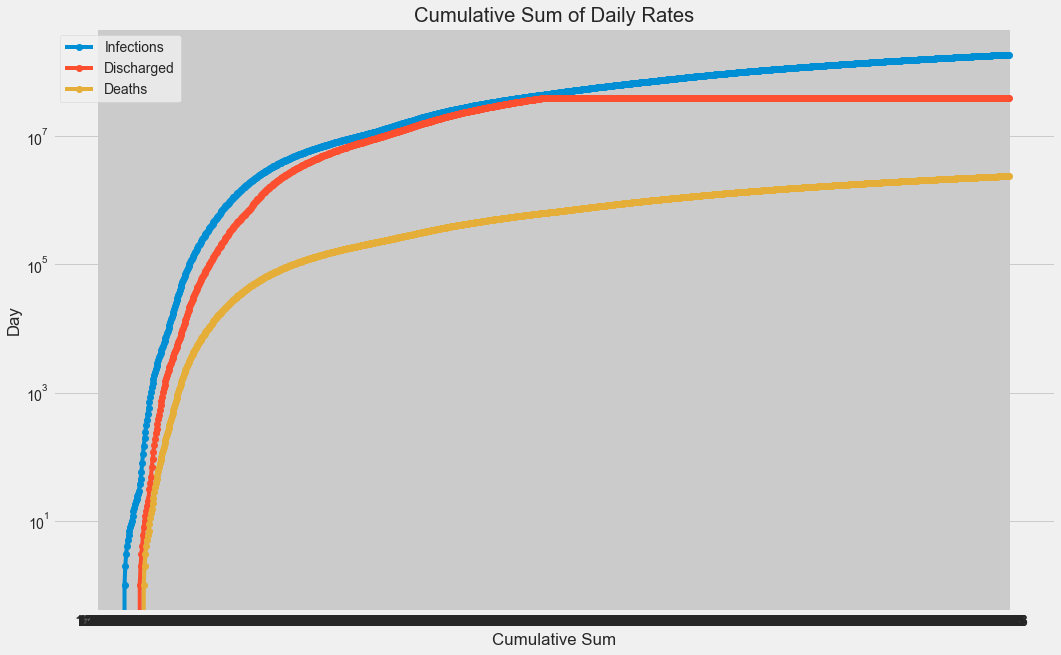

In [27]:
# Transpose the DataFrame
John_Hopkins_Nigeria_data_trans = John_Hopkins_Nigeria_data.transpose()

# Calculate the cumulative sum for each title
John_Hopkins_Nigeria_data_trans_cumulative = John_Hopkins_Nigeria_data.cumsum(axis=1)

# Create the plot
plt.figure(figsize=(16, 10))

for title in John_Hopkins_Nigeria_data_trans_cumulative.index:
    plt.plot(John_Hopkins_Nigeria_data_trans_cumulative.columns, John_Hopkins_Nigeria_data_trans_cumulative.loc[title], marker='o', label=title)

plt.title('Cumulative Sum of Daily Rates')
plt.ylabel('Day')
plt.xlabel('Cumulative Sum')

plt.yscale('log')

plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Reshape DataFrame from wide to long format to calculate the diff.
John_Hopkins_Nigeria_data_melted = John_Hopkins_Nigeria_data.melt(var_name='Date', value_name='Infections')
John_Hopkins_Nigeria_data_melted['Date'] = pd.to_datetime(John_Hopkins_Nigeria_data_melted['Date'])
John_Hopkins_Nigeria_data_melted.set_index('Date', inplace=True)


# Calculate the daily rate
daily_rate = John_Hopkins_Nigeria_data_melted['Infections'].diff()

# Display results
print('Daily rate:')
print(daily_rate)

Daily rate:
Date
2020-01-26         NaN
2020-01-26         0.0
2020-01-26         0.0
2020-01-27         0.0
2020-01-27         0.0
                ...   
2023-03-08   -266598.0
2023-03-08      3155.0
2023-03-09    263443.0
2023-03-09   -266598.0
2023-03-09      3155.0
Name: Infections, Length: 3417, dtype: float64


In [29]:
# Select the row containing the infection counts
Infections = John_Hopkins_Nigeria_data.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Calculate the derivative of the daily rate
derivative = daily_rate.diff()

# Display results
print('Daily rate:')
print(daily_rate)
print('Derivative of daily rate:')
print(derivative)

Daily rate:
1/26/20    NaN
1/27/20    0.0
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1139, dtype: float64
Derivative of daily rate:
1/26/20    NaN
1/27/20    NaN
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1139, dtype: float64


<AxesSubplot:>

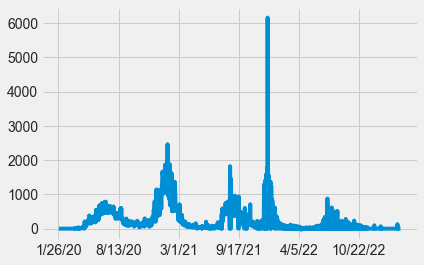

In [30]:
# Transpose the DataFrame
John_Hopkins_Nigeria_data_transposed = John_Hopkins_Nigeria_data.T

# Calculate the daily difference in 'Infections' and store it in a new column 'daily_infections'
John_Hopkins_Nigeria_data_transposed['daily_infections'] = John_Hopkins_Nigeria_data_transposed['Infections'].diff()

# Plot 'daily_infections'
John_Hopkins_Nigeria_data_transposed['daily_infections'].plot()

In [31]:
# Find the date with the highest infection rate
date_highest_infection = John_Hopkins_Nigeria_data_transposed['daily_infections'].idxmax()

# Find the highest infection rate
highest_infection_rate = John_Hopkins_Nigeria_data_transposed['daily_infections'].max()

print("The date with the highest infection rate is:", date_highest_infection)
print("The highest infection rate is:", highest_infection_rate)


The date with the highest infection rate is: 12/22/21
The highest infection rate is: 6158.0


In [32]:
# Find the date with the highest infection rate
date_highest_infection = John_Hopkins_Nigeria_data_transposed['daily_infections'].idxmax()

print("The date with the highest infection rate is:", date_highest_infection)

The date with the highest infection rate is: 12/22/21


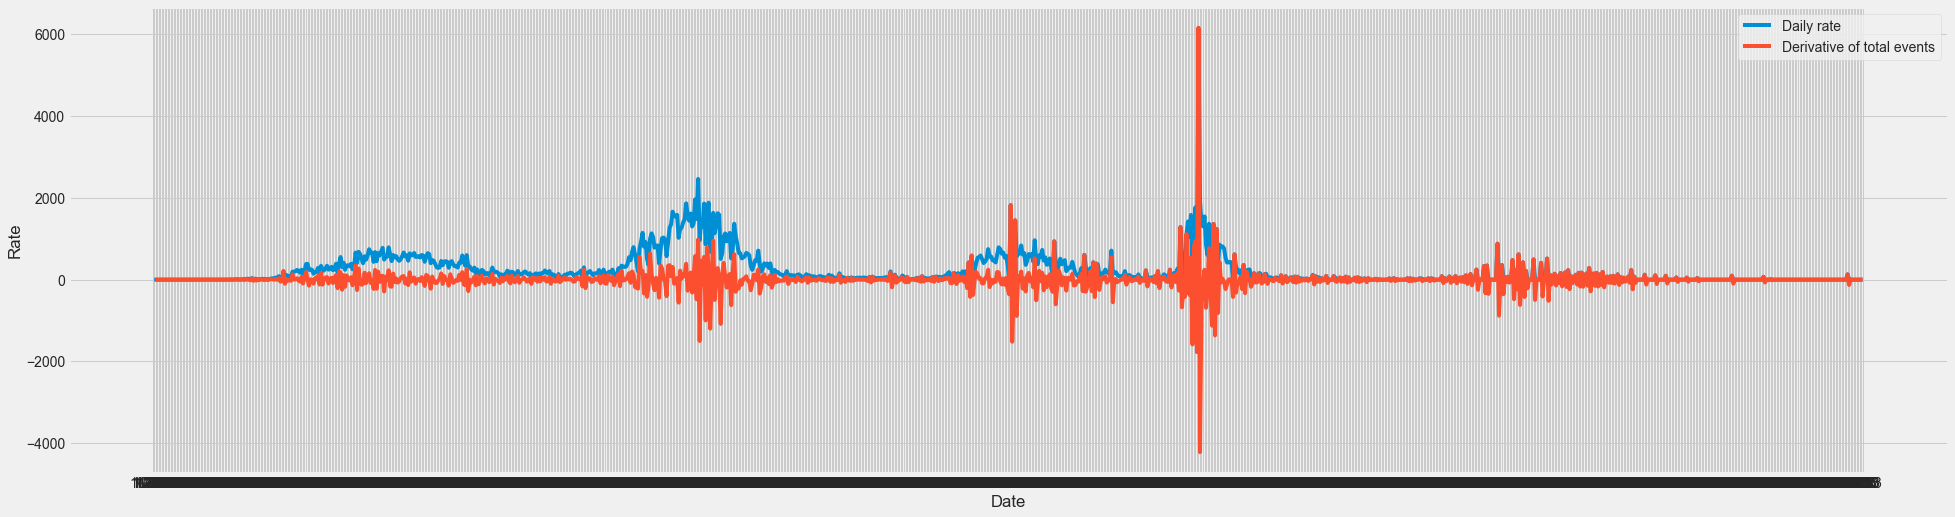

In [33]:
# Calculate the derivative of total events
#cumulative_events = John_Hopkins_Nigeria_data['Infections'].cumsum()
#derivative = cumulative_events.diff() / cumulative_events.index.to_series().diff().dt.days

Infections = John_Hopkins_Nigeria_data.loc['Infections']

# Plot daily rate
plt.figure(figsize=(30,8))
plt.plot(daily_rate, label='Daily rate')

# Plot derivative of total events
plt.plot(derivative, label='Derivative of total events')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()

# Show plot
plt.show()

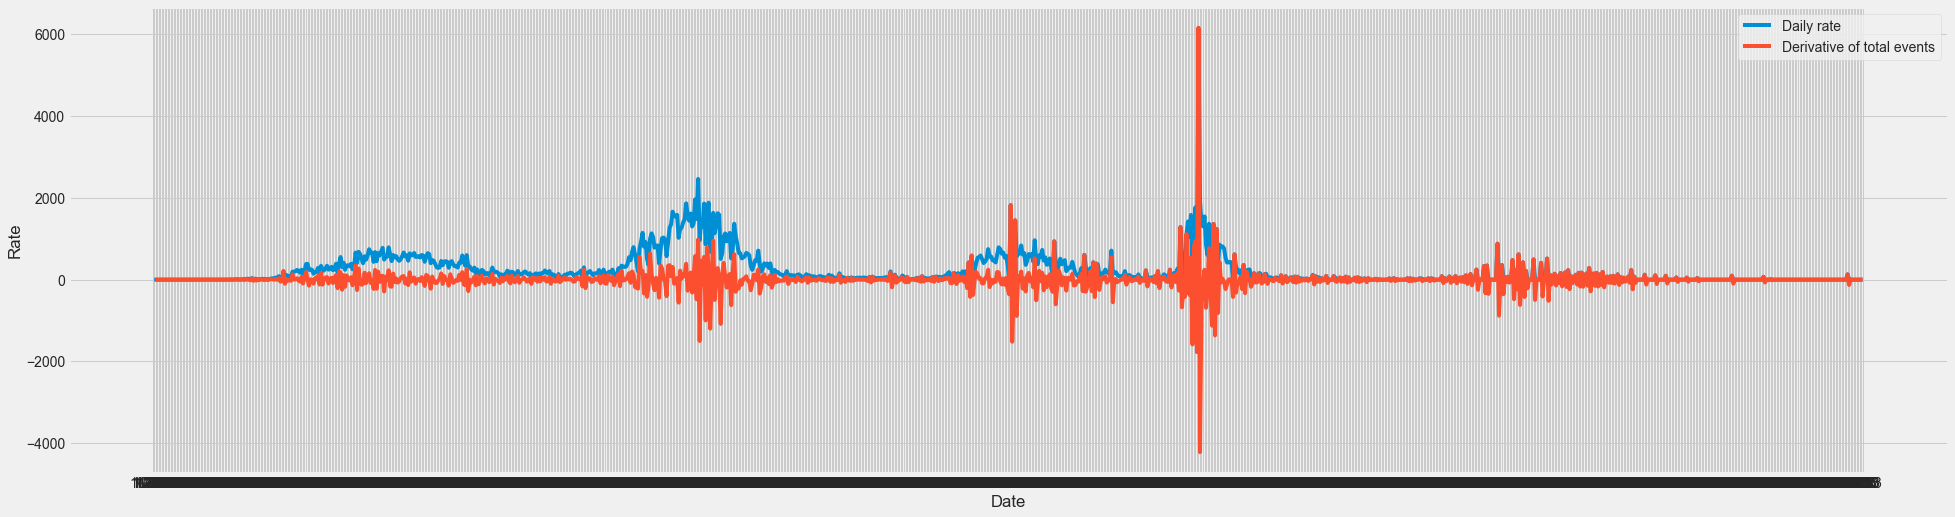

In [34]:
Infections = John_Hopkins_Nigeria_data.loc['Discharged']

# Plot daily rate
plt.figure(figsize=(30,8))
plt.plot(daily_rate, label='Daily rate')

# Plot derivative of total events
plt.plot(derivative, label='Derivative of total events')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()

# Show plot
plt.show()

In [35]:
# Select the row containing the infection counts to isolate max rate and date.
Infections = John_Hopkins_Nigeria_data.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Find the maximum infection rate
max_rate = daily_rate.max()

# Find the date when the maximum infection rate occurred
max_date = daily_rate.idxmax()

# Display results
print('Maximum infection rate:', max_rate)
print('Date of maximum infection rate:', max_date)

Maximum infection rate: 6158.0
Date of maximum infection rate: 12/22/21


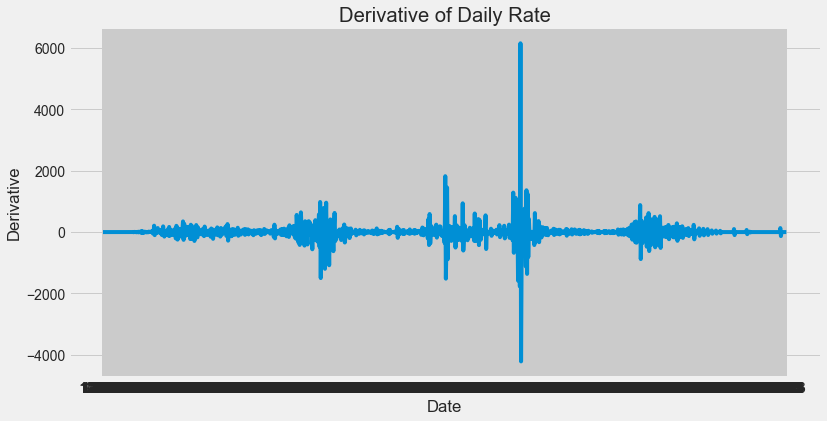

Daily rate:
1/26/20    NaN
1/27/20    0.0
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1139, dtype: float64
Derivative of daily rate:
1/26/20    NaN
1/27/20    NaN
1/28/20    0.0
1/29/20    0.0
1/30/20    0.0
          ... 
3/5/23     0.0
3/6/23     0.0
3/7/23     0.0
3/8/23     0.0
3/9/23     0.0
Name: Infections, Length: 1139, dtype: float64


In [36]:
# Select the row containing the infection counts
Infections = John_Hopkins_Nigeria_data.loc['Infections']

# Calculate the daily rate
daily_rate = Infections.diff()

# Calculate the derivative of the daily rate
derivative = daily_rate.diff()

# Plot the derivative of the daily rate
plt.figure(figsize=(12,6))
plt.plot(derivative)
plt.title('Derivative of Daily Rate')
plt.xlabel('Date')
plt.ylabel('Derivative')
plt.show()

# Display results
print('Daily rate:')
print(daily_rate)
print('Derivative of daily rate:')
print(derivative)


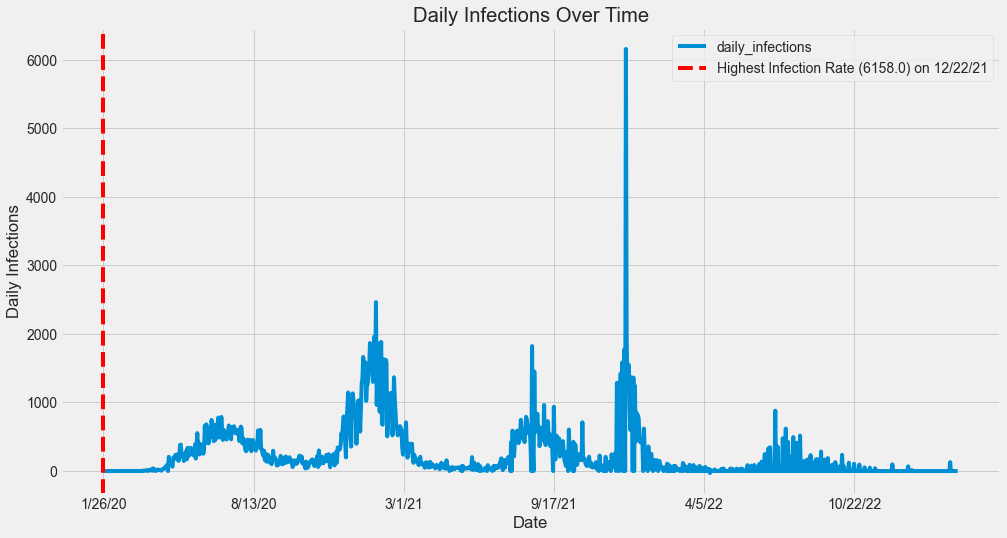

In [37]:
# First transpose the data.
John_Hopkins_Nigeria_data_transposed = John_Hopkins_Nigeria_data.T

# Calculate the daily difference in 'Infections' and store it in a new column 'daily_infections'
John_Hopkins_Nigeria_data_transposed['daily_infections'] = John_Hopkins_Nigeria_data_transposed['Infections'].diff()

# Find the date with the highest infection rate
date_highest_infection = John_Hopkins_Nigeria_data_transposed['daily_infections'].idxmax()

# Find the highest infection rate
highest_infection_rate = John_Hopkins_Nigeria_data_transposed['daily_infections'].max()

# Plot daily infections
plt.figure(figsize=(15,8))
John_Hopkins_Nigeria_data_transposed['daily_infections'].plot(kind='line', title='Daily Infections Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Infections')

# Highlight the date with the highest infection rate
plt.axvline(x=date_highest_infection, color='r', linestyle='--', label=f'Highest Infection Rate ({highest_infection_rate}) on {date_highest_infection}')
plt.legend()

plt.show()


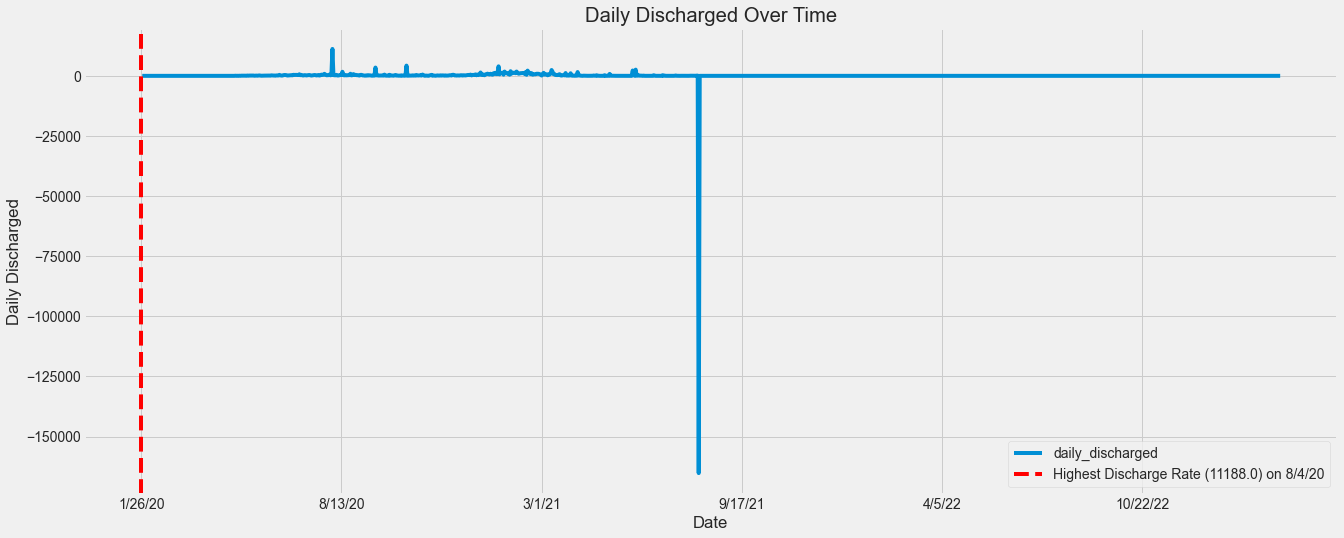

In [38]:
# Calculate the daily difference in 'Infections' and store it in a new column 'daily_infections'
John_Hopkins_Nigeria_data_transposed['daily_discharged'] = John_Hopkins_Nigeria_data_transposed['Discharged'].diff()

# Find the date with the highest infection rate
date_highest_discharge = John_Hopkins_Nigeria_data_transposed['daily_discharged'].idxmax()

# Find the highest infection rate
highest_discharge_rate = John_Hopkins_Nigeria_data_transposed['daily_discharged'].max()

# Plot daily infections
plt.figure(figsize=(20,8))
John_Hopkins_Nigeria_data_transposed['daily_discharged'].plot(kind='line', title='Daily Discharged Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Discharged')

# Highlight the date with the highest infection rate
plt.axvline(x=date_highest_discharge, color='r', linestyle='--', label=f'Highest Discharge Rate ({highest_discharge_rate}) on {date_highest_discharge}')
plt.legend()

plt.show()


In [39]:
# Calculate the daily difference in 'Infections' and store it in a new column 'daily_infections'
John_Hopkins_Nigeria_data_transposed['daily_deaths'] = John_Hopkins_Nigeria_data_transposed['Deaths'].diff()

# Find the date with the highest infection rate
date_highest_death = John_Hopkins_Nigeria_data_transposed['daily_deaths'].idxmax()

# Find the highest infection rate
highest_death_rate = John_Hopkins_Nigeria_data_transposed['daily_deaths'].max()

# Plot daily infections
plt.figure(figsize=(15,8))
John_Hopkins_Nigeria_data_transposed['daily_deaths'].plot(kind='line', title='Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')

# Highlight the date with the highest infection rate
plt.axvline(x=date_highest_death, color='r', linestyle='--', label=f'Highest Death Rate ({highest_death_rate}) on {date_highest_death}')
plt.legend()

plt.show()


In [40]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(12, 8))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['Population'], color='green')
ax1.set_xlabel('Index')
ax1.set_ylabel('Population', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()


In [41]:
# Creating a new df by merging the DataFrames Nigeria_covid_external and Nigeria_NCDC_Data on the column states
merged_Nigera_data = pd.merge(Nigeria_covid_external, Nigera_NCDC_Data, left_on='states', right_on = 'States Affected')

# Display the merged DataFrame
# print(merged_Nigera_data)

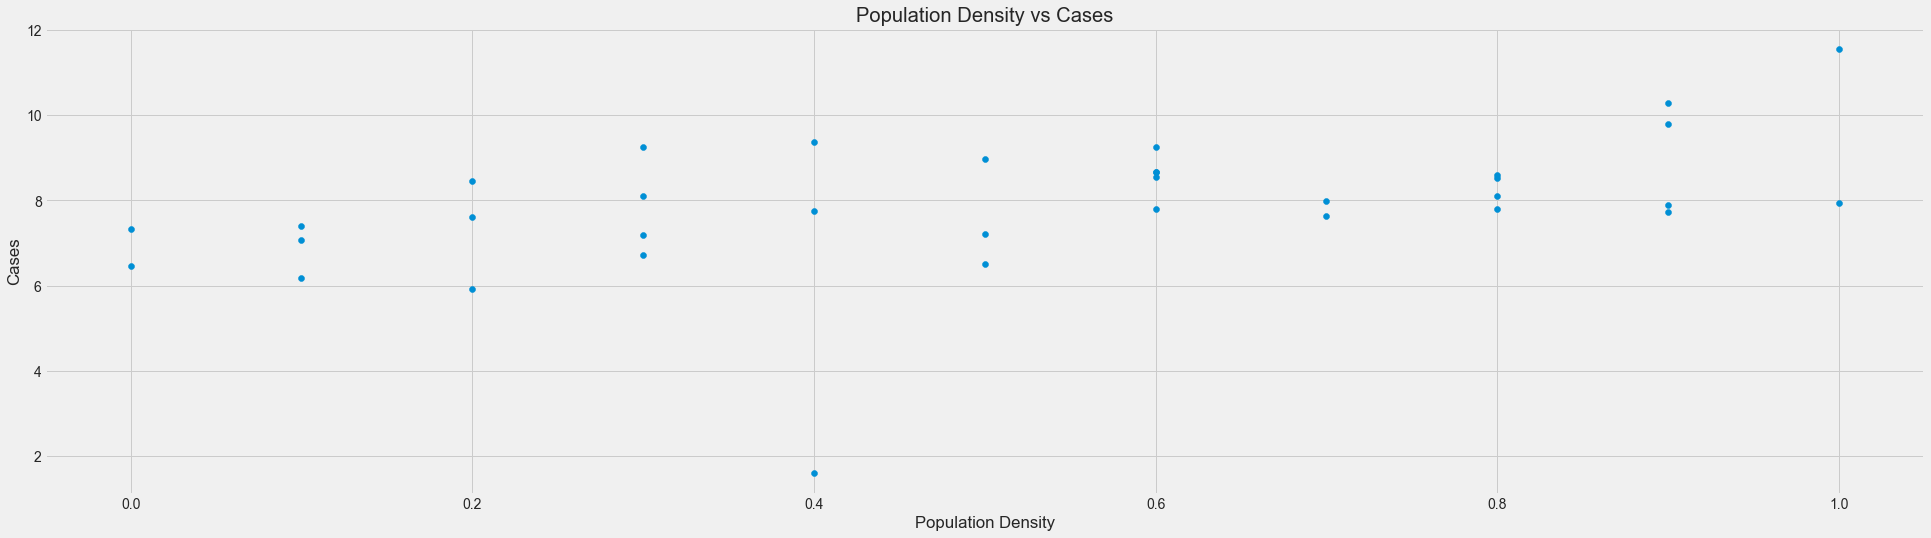

In [42]:
# Plotting columns 'Population_Density' against the log of 'Cases'
plt.figure(figsize=(30,8))
plt.scatter(merged_Nigera_data['Population Density'], np.log(merged_Nigera_data['Cases']))
plt.xlabel('Population Density')
plt.ylabel('Cases')
plt.title('Population Density vs Cases')
plt.show()

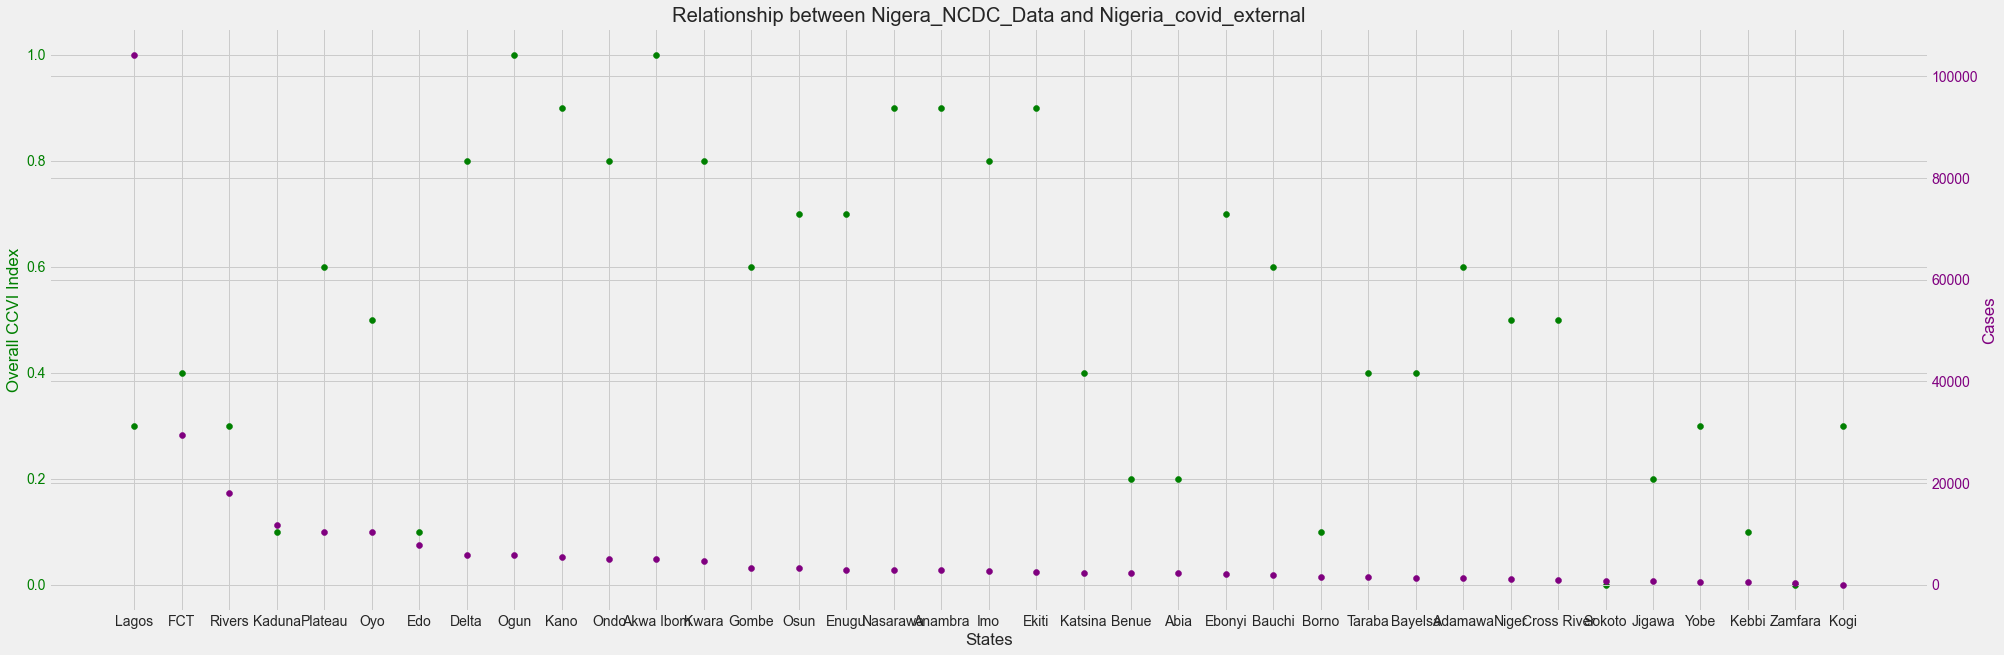

In [43]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 10))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
# ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['states'], s=Nigeria_covid_external['Population Density'], color='green')
ax1.scatter(Nigeria_covid_external['states'], Nigeria_covid_external['Overall CCVI Index'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Overall CCVI Index', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
# ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['States Affected'], s=Nigera_NCDC_Data['Cases'], color='purple')
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()

In [44]:
# Create a figure and two axes for the plot
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the first dataframe on the left y-axis
ax1.plot(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Cases', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right

ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis
ax2.plot(Nigeria_covid_external['states'], Nigeria_covid_external['Population'], color='purple')
ax2.set_ylabel('Population', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()

In [45]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 8))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis
ax1.plot(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='green')
ax1.set_xlabel('X')
ax1.set_ylabel('Cases', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis
ax2.plot(Nigeria_covid_external['states'], Nigeria_covid_external['Population'], color='purple')
ax2.set_ylabel('Population', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()


In [46]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 10))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
# ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['states'], s=Nigeria_covid_external['Population Density'], color='green')
ax1.scatter(Nigeria_covid_external['states'], Nigeria_covid_external['Population Density'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Population Density', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
# ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['States Affected'], s=Nigera_NCDC_Data['Cases'], color='purple')
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()


In [47]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 8))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
# ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['states'], s=Nigeria_covid_external['Population Density'], color='green')
ax1.scatter(Nigeria_covid_external['states'], Nigeria_covid_external['Fragility'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Fragility', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
# ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['States Affected'], s=Nigera_NCDC_Data['Cases'], color='purple')
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_covid_external')
plt.show()


In [48]:
Nigeria_budget_data.columns

Index(['states', 'Initial_budget (Bn)', 'Revised_budget (Bn)'], dtype='object')

In [49]:
Nigeria_budget_data['percentage_difference'] = ((Nigeria_budget_data['Revised_budget (Bn)'] - Nigeria_budget_data['Initial_budget (Bn)']) / Nigeria_budget_data['Initial_budget (Bn)']) * 100

In [50]:
Nigeria_budget_data.head()

states  Initial_budget (Bn)  Revised_budget (Bn)  percentage_difference
0       Abia               136.60               102.70             -24.816984
1    Adamawa               183.30               139.31             -23.998909
2  Akwa-Ibom               597.73               366.00             -38.768340
3    Anambra               137.10               112.80             -17.724289
4     Bauchi               167.20               128.00             -23.444976

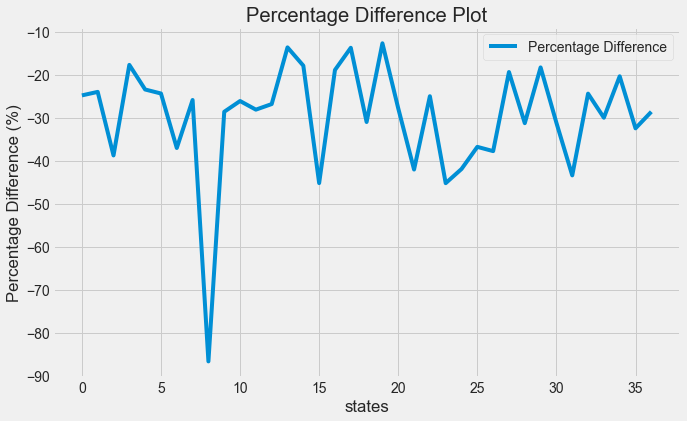

In [51]:
Nigeria_budget_data['percentage_difference'] = ((Nigeria_budget_data['Revised_budget (Bn)'] - Nigeria_budget_data['Initial_budget (Bn)']) / Nigeria_budget_data['Initial_budget (Bn)']) * 100

plt.figure(figsize=(10,6))
plt.plot(Nigeria_budget_data.index, Nigeria_budget_data['percentage_difference'], label='Percentage Difference')
plt.xlabel('states')
plt.ylabel('Percentage Difference (%)')
plt.title('Percentage Difference Plot')
plt.legend()
plt.show()


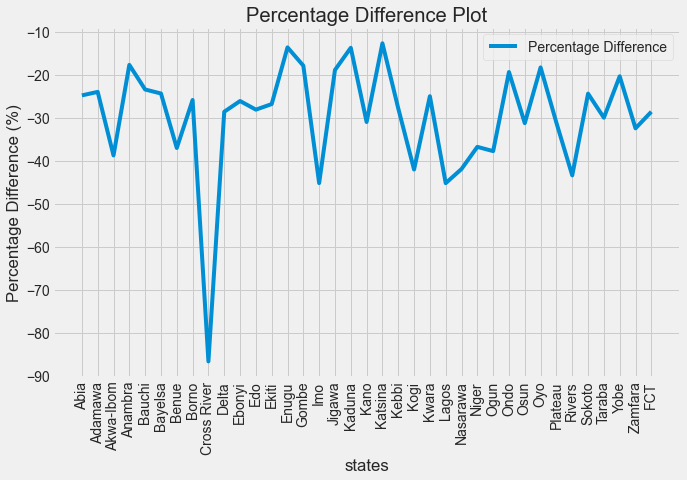

In [52]:
Nigeria_budget_data['percentage_difference'] = ((Nigeria_budget_data['Revised_budget (Bn)'] - Nigeria_budget_data['Initial_budget (Bn)']) / Nigeria_budget_data['Initial_budget (Bn)']) * 100

plt.figure(figsize=(10,6))
plt.plot(Nigeria_budget_data['states'], Nigeria_budget_data['percentage_difference'], label='Percentage Difference')

# Get the state names
state_names = Nigeria_budget_data['states'].tolist()

# Set the xticks to be the state names
plt.xticks(ticks=range(len(state_names)), labels=state_names, rotation=90)

plt.xlabel('states')
plt.ylabel('Percentage Difference (%)')
plt.title('Percentage Difference Plot')
plt.legend()
plt.show()


In [53]:
Nigeria_budget_data.head(10)

states  Initial_budget (Bn)  Revised_budget (Bn)  \
0         Abia               136.60               102.70   
1      Adamawa               183.30               139.31   
2    Akwa-Ibom               597.73               366.00   
3      Anambra               137.10               112.80   
4       Bauchi               167.20               128.00   
5      Bayelsa               242.18               183.15   
6        Benue               189.00               119.00   
7        Borno               146.80               108.80   
8  Cross River              1100.00               147.10   
9        Delta               395.50               282.30   

   percentage_difference  
0             -24.816984  
1             -23.998909  
2             -38.768340  
3             -17.724289  
4             -23.444976  
5             -24.374432  
6             -37.037037  
7             -25.885559  
8             -86.627273  
9             -28.621997

In [54]:
# Merge the datasets on the 'states' column
merged_budget_NCDC_data = pd.merge(Nigeria_budget_data, Nigera_NCDC_Data, left_on='states', right_on='States Affected')
# Use this 'merged_budget_NCDC_data['YourColumnName']' to select the X axis or use the syntax below
# merged_budget_NCDC_data.set_index('states', inplace=True)
merged_budget_NCDC_data.head()


states  Initial_budget (Bn)  Revised_budget (Bn)  percentage_difference  \
0     Abia               136.60               102.70             -24.816984   
1  Adamawa               183.30               139.31             -23.998909   
2  Anambra               137.10               112.80             -17.724289   
3   Bauchi               167.20               128.00             -23.444976   
4  Bayelsa               242.18               183.15             -24.374432   

  States Affected  Cases  Hospitalized  Discharged  Deaths  
0            Abia   2263             0        2229      34  
1         Adamawa   1312           134        1140      38  
2         Anambra   2825            46        2760      19  
3          Bauchi   2028             2        2002      24  
4         Bayelsa   1373             2        1343      28

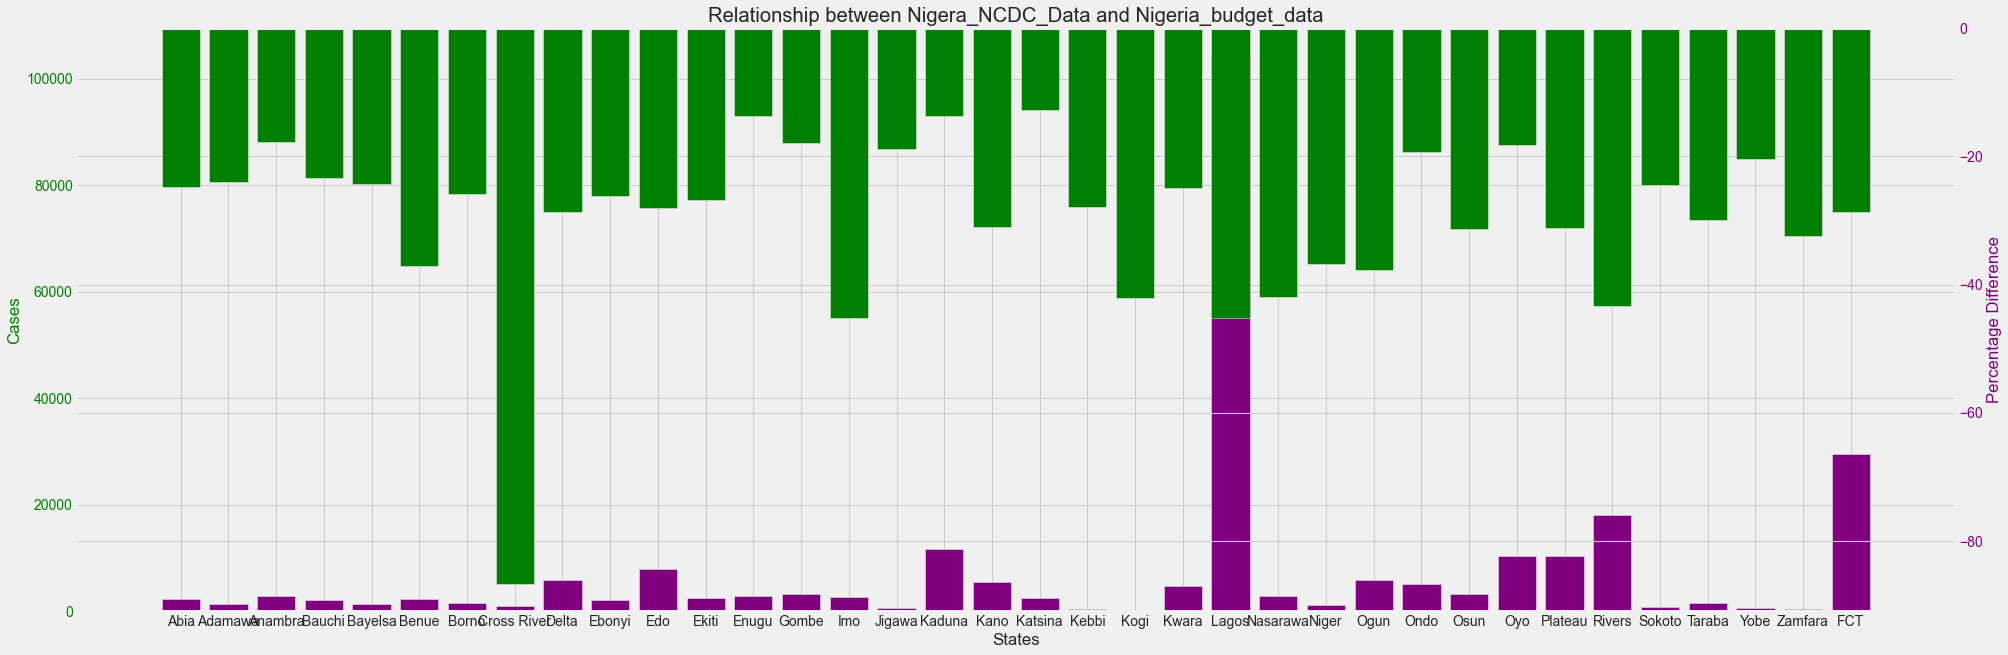

In [55]:
fig, ax1 = plt.subplots(figsize=(30, 10))
# ax1.bar(Nigeria_budget_data['states'], Nigeria_budget_data['percentage_difference'], color='green')
# ax2.bar(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
# Plot the first dataframe on the left y-axis using bar
ax1.bar(merged_budget_NCDC_data['States Affected'], merged_budget_NCDC_data['Cases'], color='purple')
ax1.set_xlabel('States')
ax1.set_ylabel('Cases', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using bar
ax2.bar(merged_budget_NCDC_data['States Affected'], merged_budget_NCDC_data['percentage_difference'], color='green')
ax2.set_ylabel('Percentage Difference', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()

In [56]:
fig, ax1 = plt.subplots(figsize =(30, 8))

# Plot 'Cases' on the first y-axis
color = 'purple'
ax1.set_xlabel('States')
ax1.set_ylabel('Cases', color=color)
ax1.plot(merged_budget_NCDC_data['States Affected'], merged_budget_NCDC_data['Cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Percentage Difference'
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Percentage Difference', color=color)
ax2.plot(merged_budget_NCDC_data['States Affected'], merged_budget_NCDC_data['percentage_difference'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()


In [57]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Percentage Difference', color=color)
ax1.plot(merged_budget_NCDC_data['percentage_difference'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_budget_NCDC_data['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()

In [58]:
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot 'Percentage Difference' on the first y-axis using bar plot
color = 'tab:green'
ax1.set_ylabel('Percentage Difference', color=color)
ax1.bar(merged_budget_NCDC_data.index, merged_budget_NCDC_data['percentage_difference'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.bar(merged_budget_NCDC_data.index, merged_budget_NCDC_data['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()


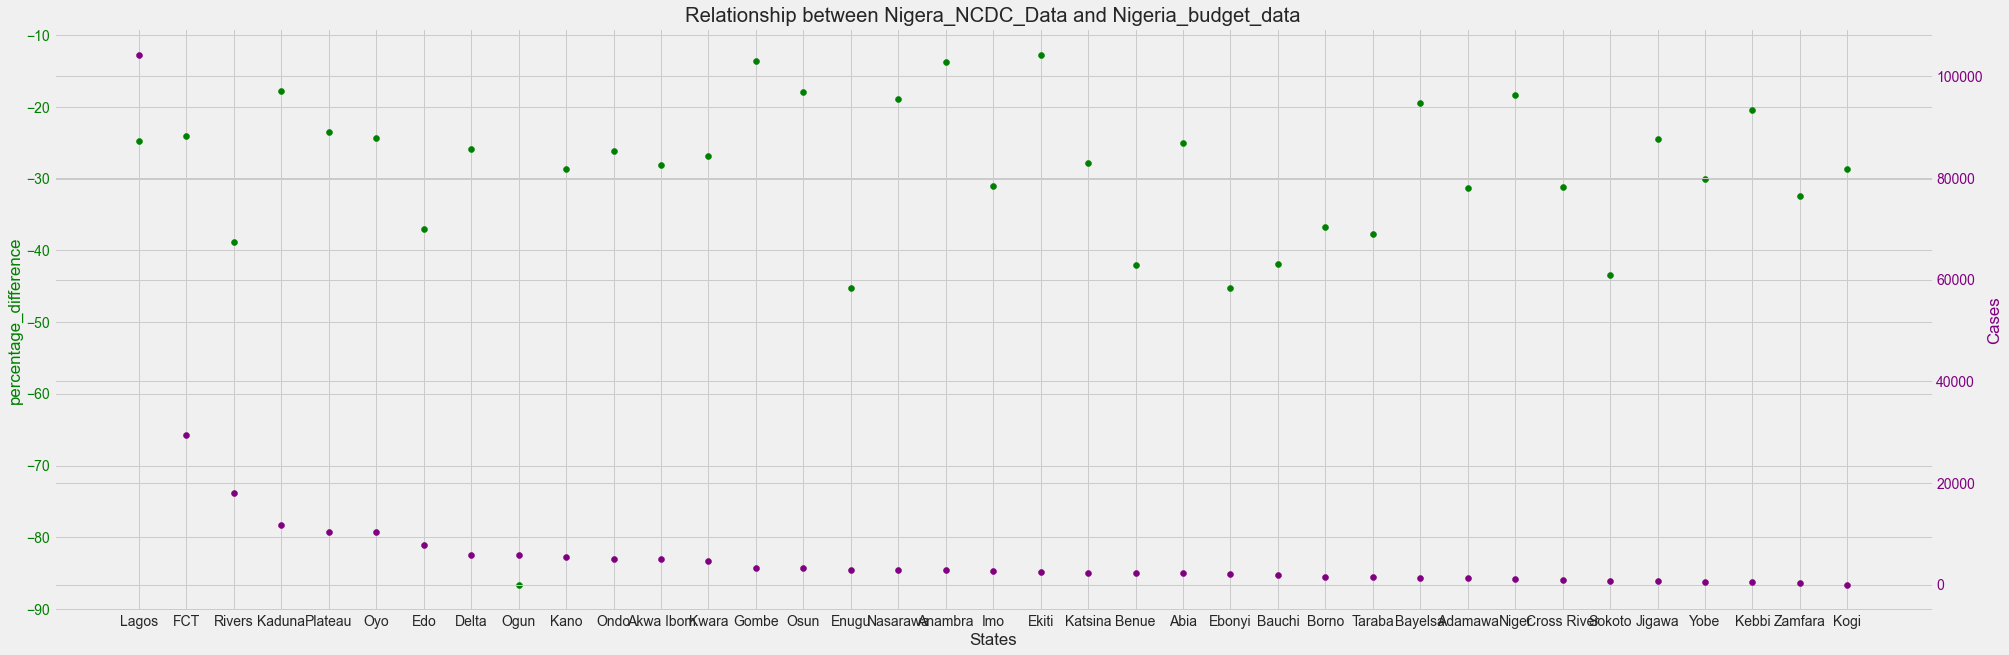

In [59]:
fig, ax1 = plt.subplots(figsize=(30, 10))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
ax1.scatter(Nigeria_budget_data['states'], Nigeria_budget_data['percentage_difference'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('percentage_difference', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()


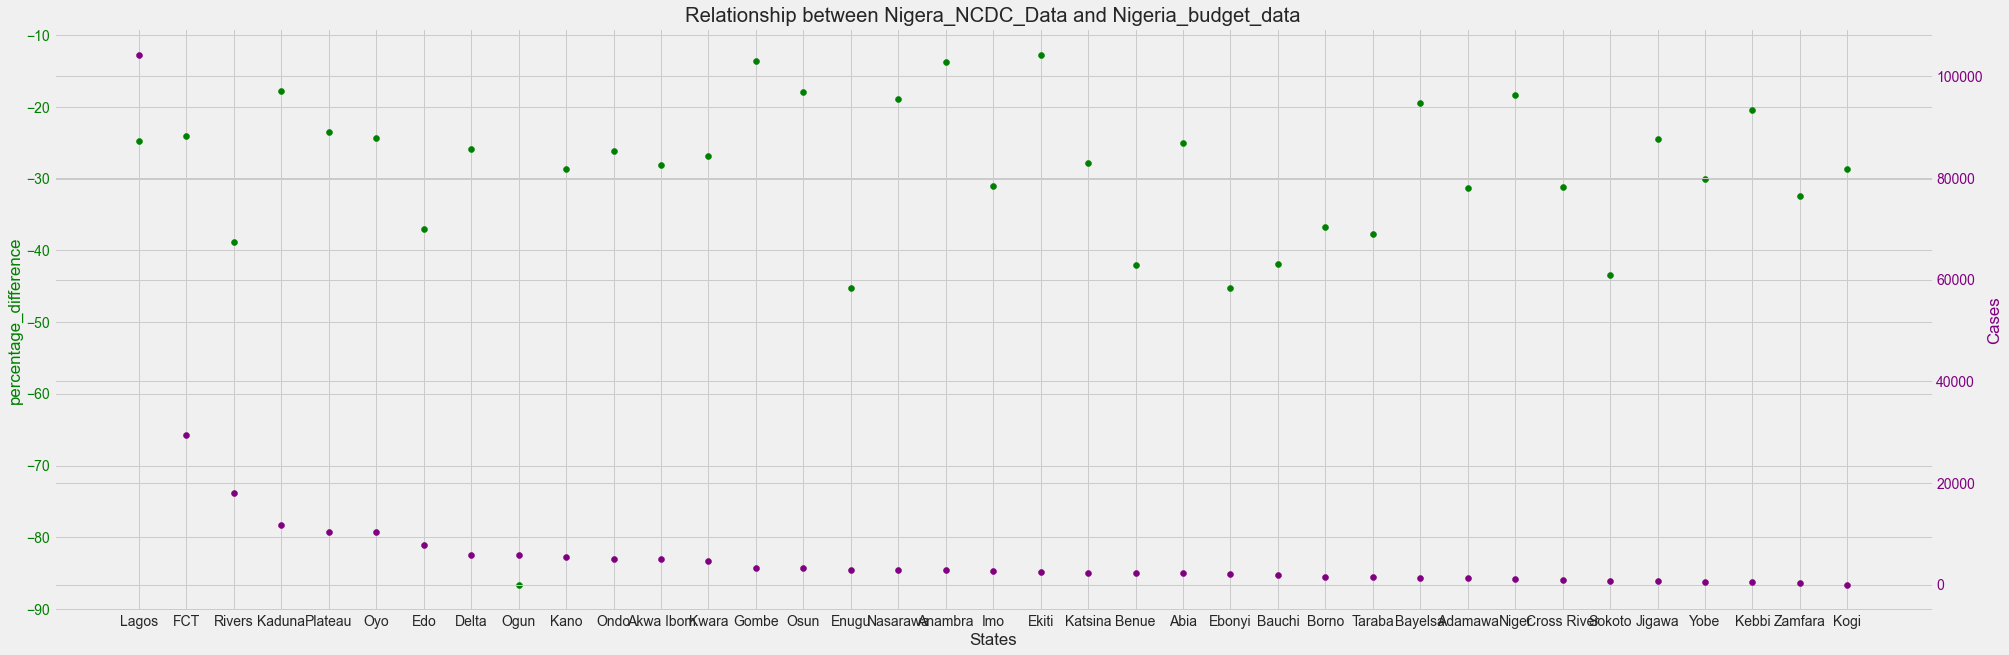

In [60]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 10))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
# ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['states'], s=Nigeria_covid_external['Population Density'], color='green')
ax1.scatter(Nigeria_budget_data['states'], Nigeria_budget_data['percentage_difference'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('percentage_difference', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
# ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['States Affected'], s=Nigera_NCDC_Data['Cases'], color='purple')
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()

In [61]:
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the first dataframe on the left y-axis using bar
ax1.bar(Nigeria_budget_data['states'], Nigeria_budget_data['Revised_budget (Bn)'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Revised_budget (Bn)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using bar
ax2.bar(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()


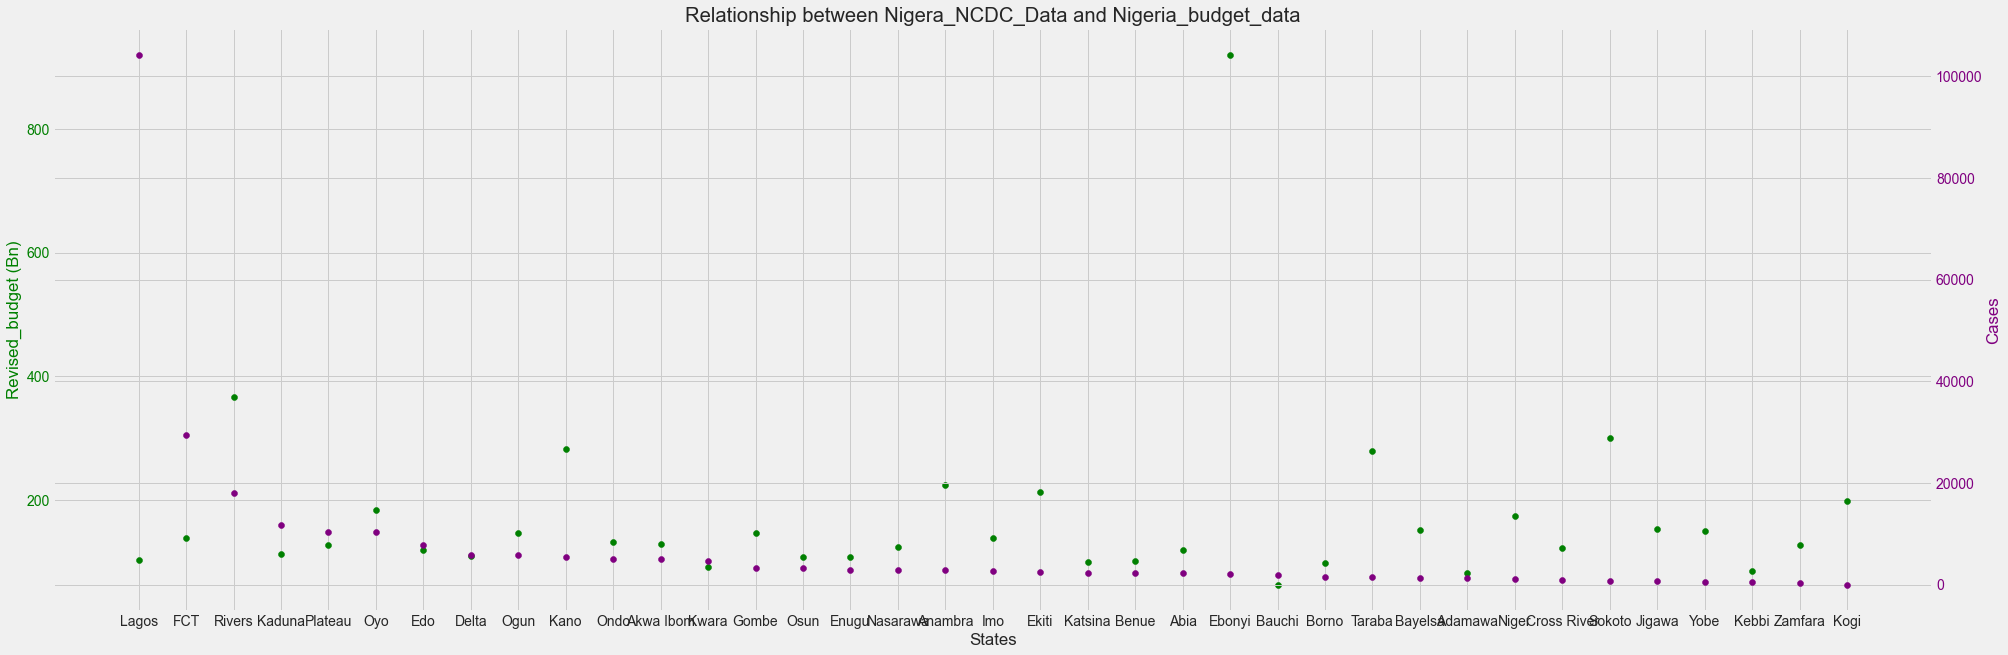

In [62]:
# Create a figure and two axes for the plot with a larger size
fig, ax1 = plt.subplots(figsize=(30, 10))  # You can adjust the numbers as per your preference

# Plot the first dataframe on the left y-axis using scatter
# ax1.scatter(Nigeria_covid_external.index, Nigeria_covid_external['states'], s=Nigeria_covid_external['Population Density'], color='green')
ax1.scatter(Nigeria_budget_data['states'], Nigeria_budget_data['Revised_budget (Bn)'], color='green')
ax1.set_xlabel('States')
ax1.set_ylabel('Revised_budget (Bn)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataframe on the right y-axis using scatter
# ax2.scatter(Nigera_NCDC_Data.index, Nigera_NCDC_Data['States Affected'], s=Nigera_NCDC_Data['Cases'], color='purple')
ax2.scatter(Nigera_NCDC_Data['States Affected'], Nigera_NCDC_Data['Cases'], color='purple')
ax2.set_ylabel('Cases', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Display the plot
plt.title('Relationship between Nigera_NCDC_Data and Nigeria_budget_data')
plt.show()

In [63]:
# To select the top ten cases in the df by descending order and creating a new df.
merged_Nigera_data_top10 = merged_Nigera_data.sort_values('Cases', ascending=False)

# Select the top ten rows and create a new df for plotting.
# merged_Nigera_data_top10 = merged_Nigera_data.nlargest(10, 'Cases')
# merged_Nigera_data_top10.set_index('states', inplace=True)


In [64]:
fig, ax1 = plt.subplots(figsize =(15, 8))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
sns.regplot(x=merged_Nigera_data_top10.index, y=merged_Nigera_data_top10['Overall CCVI Index'], color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
sns.regplot(x=merged_Nigera_data_top10.index, y=merged_Nigera_data_top10['Cases'], color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


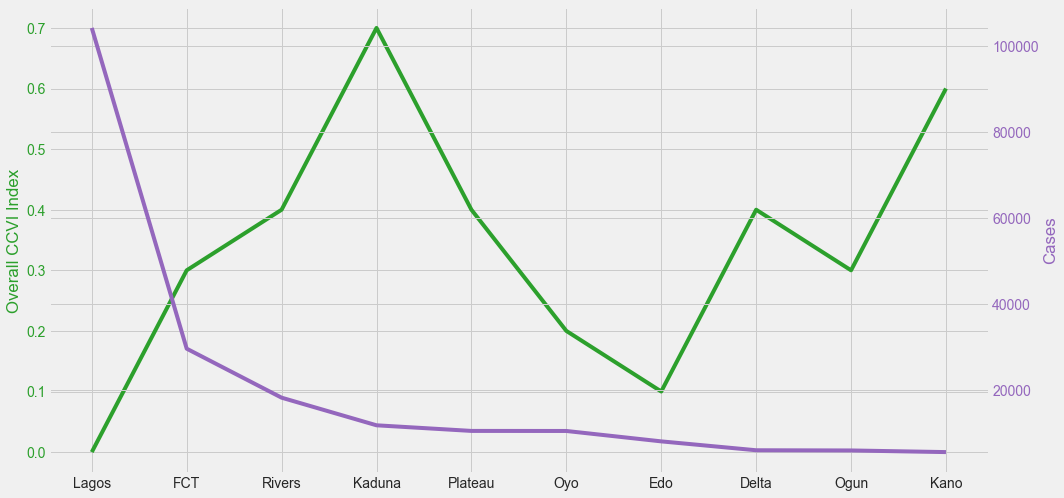

In [65]:
# Generate line plots to compare two columns.
# Create a figure and a set of subplots
merged_Nigera_data_top10 = merged_Nigera_data.nlargest(10, 'Cases')
merged_Nigera_data_top10.set_index('states', inplace=True)
fig, ax1 = plt.subplots(figsize =(15, 8))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.plot(merged_Nigera_data_top10.index, merged_Nigera_data_top10['Overall CCVI Index'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_Nigera_data_top10.index, merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


In [66]:
# Using bar and line plot on the new dfjc1 dataframe
x = merged_Nigera_data_top10.index
y1 = merged_Nigera_data_top10['Overall CCVI Index']
y2 = merged_Nigera_data_top10['Cases']

fig, ax1 = plt.subplots(figsize = (30, 10))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.bar(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

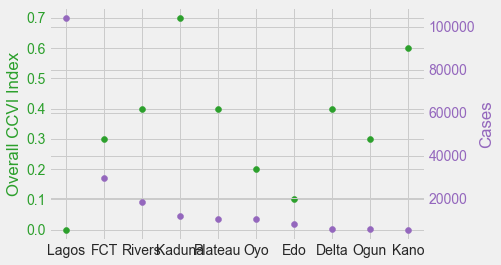

In [67]:
# Using a scatter plot to plot dfjc1 DataFrame
x = merged_Nigera_data_top10.index
y1 = merged_Nigera_data_top10['Overall CCVI Index']
y2 = merged_Nigera_data_top10['Cases']

fig, ax1 = plt.subplots()

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.scatter(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.scatter(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


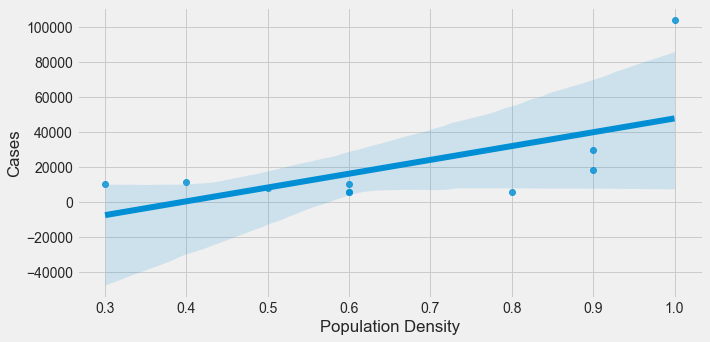

In [68]:
# Using a regression plot.
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.regplot(x ='Population Density', y ='Cases', data=merged_Nigera_data_top10)

plt.show()

In [69]:
# Set 'states' as the index
# merged_Nigera_data_top10.set_index('states', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.plot(merged_Nigera_data_top10['Overall CCVI Index'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


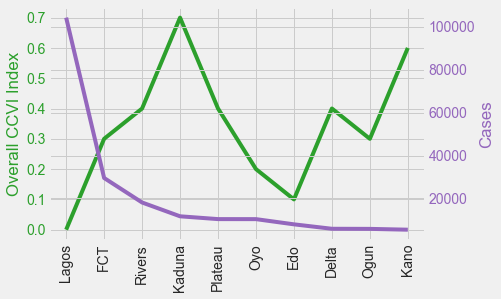

In [70]:
fig, ax1 = plt.subplots()

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Overall CCVI Index', color=color)
ax1.plot(merged_Nigera_data_top10['Overall CCVI Index'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis labels to row names
ax1.set_xticks(range(len(merged_Nigera_data_top10.index)))
ax1.set_xticklabels(merged_Nigera_data_top10.index, rotation=90)  # Rotate labels if they are long

# Show the plot
plt.show()


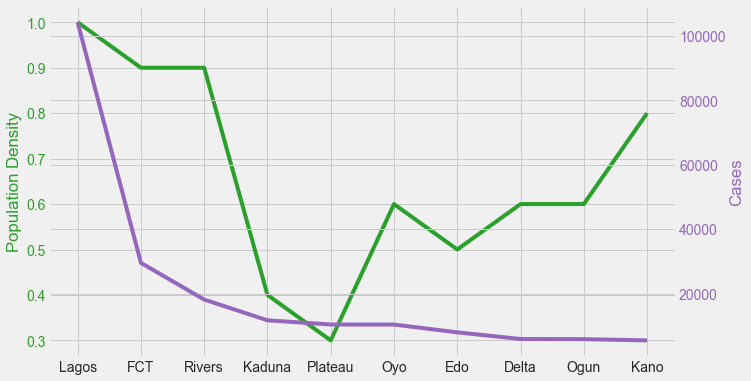

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Population Density', color=color)
ax1.plot(merged_Nigera_data_top10['Population Density'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


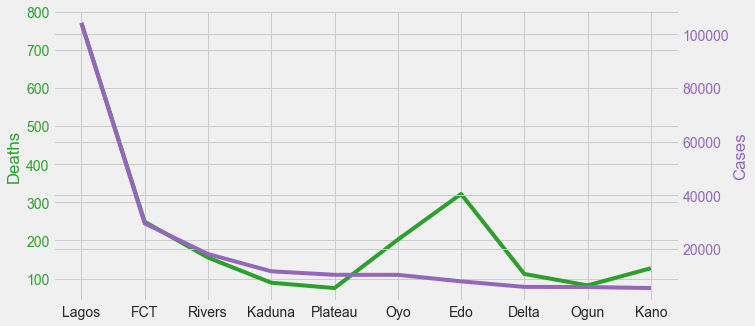

In [72]:
# Set 'states' as the index
# merged_Nigera_data_top10.set_index('states', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot 'Overall CCVI Index' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Deaths', color=color)
ax1.plot(merged_Nigera_data_top10['Deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for 'Cases'
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.plot(merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


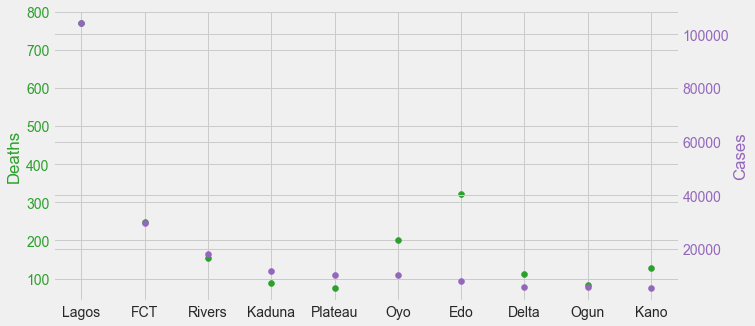

In [73]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Scatter plot 'Cases' on the first y-axis
color = 'tab:green'
ax1.set_ylabel('Deaths', color=color)
ax1.scatter(merged_Nigera_data_top10.index, merged_Nigera_data_top10['Deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Scatter plot 'Deaths' on the second y-axis
ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Cases', color=color)
ax2.scatter(merged_Nigera_data_top10.index, merged_Nigera_data_top10['Cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()


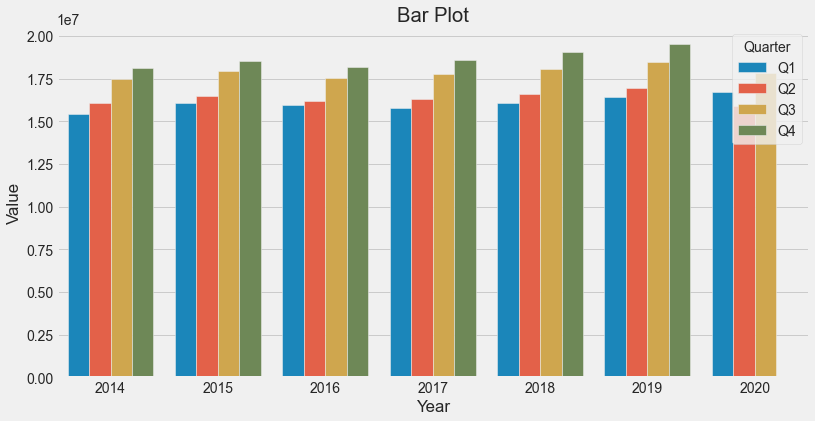

In [74]:
Nigeria_realGDP_melt = pd.melt(Nigeria_realGDP, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Value', hue='Quarter', data=Nigeria_realGDP_melt)
# barplot = sns.barplot(x='Year', y='Value', hue='Quarter', data=dfu3_melt)


plt.title('Bar Plot')
plt.show()

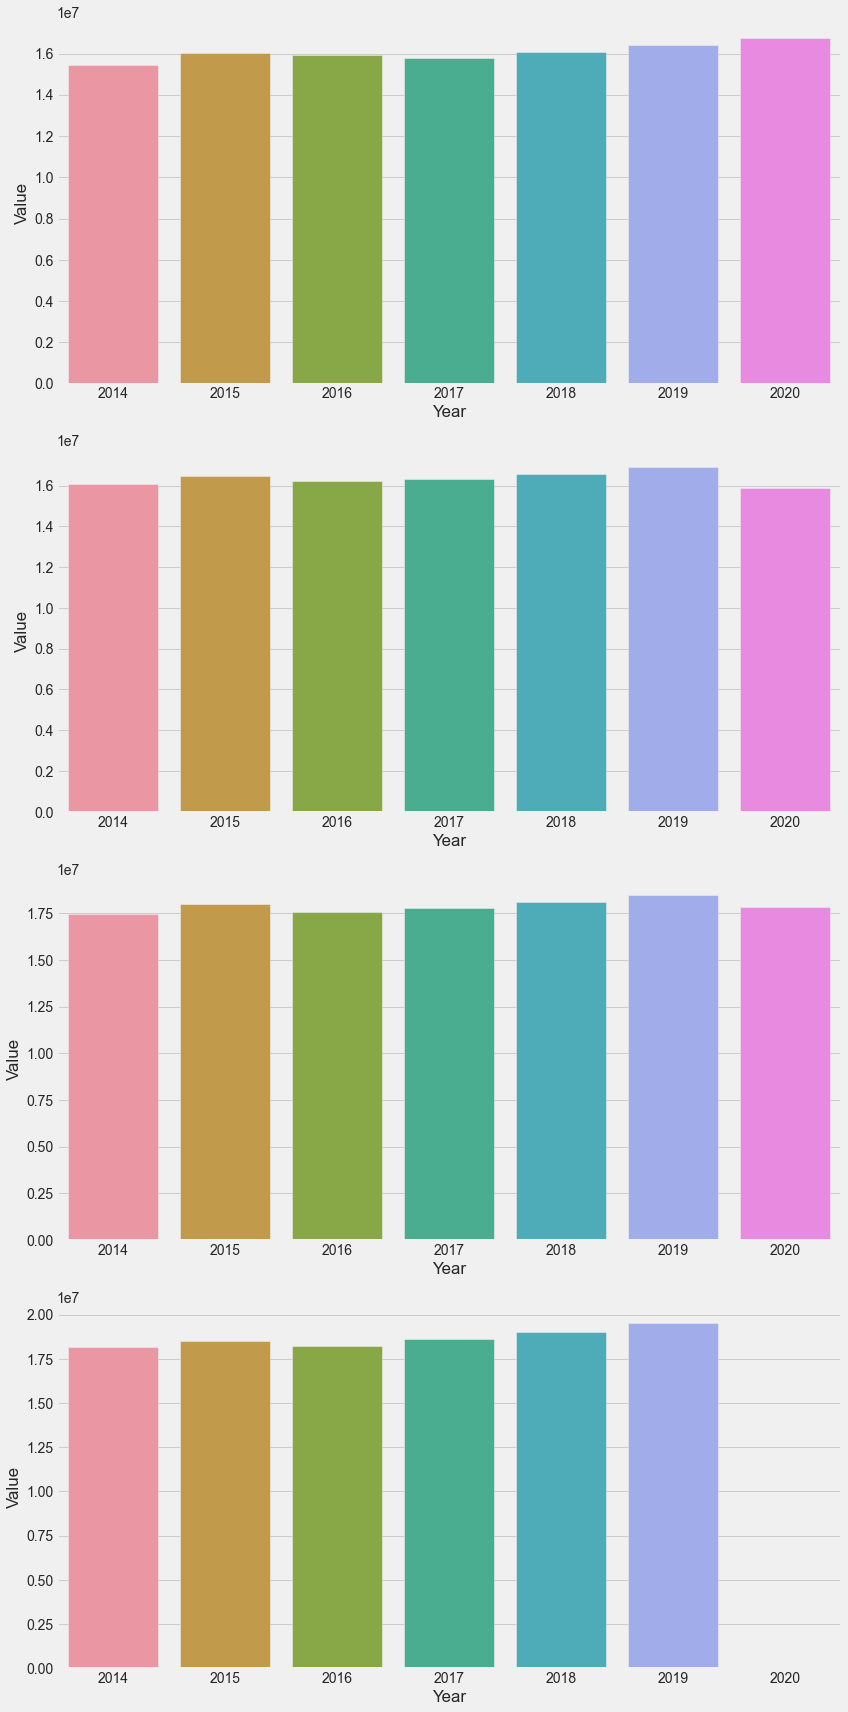

In [75]:
# Reshape the DataFrame with pd.melt()
Nigeria_realGDP_melt = pd.melt(Nigeria_realGDP, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a figure and axes for 4 subplots (one for each quarter)
fig, axs = plt.subplots(4, figsize=(12,24))

# Draw a horizontal line at the value of Q2 in year 2020
q2_2020_value = Nigeria_realGDP.loc[Nigeria_realGDP['Year'] == 2020, 'Q2'].values[0]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for i, ax in enumerate(axs):
    # Create a bar plot for each quarter
    quarter_data = Nigeria_realGDP_melt[Nigeria_realGDP_melt['Quarter'] == quarters[i]]
    sns.barplot(x='Year', y='Value', data=quarter_data, ax=ax)
    

plt.tight_layout()
plt.show()


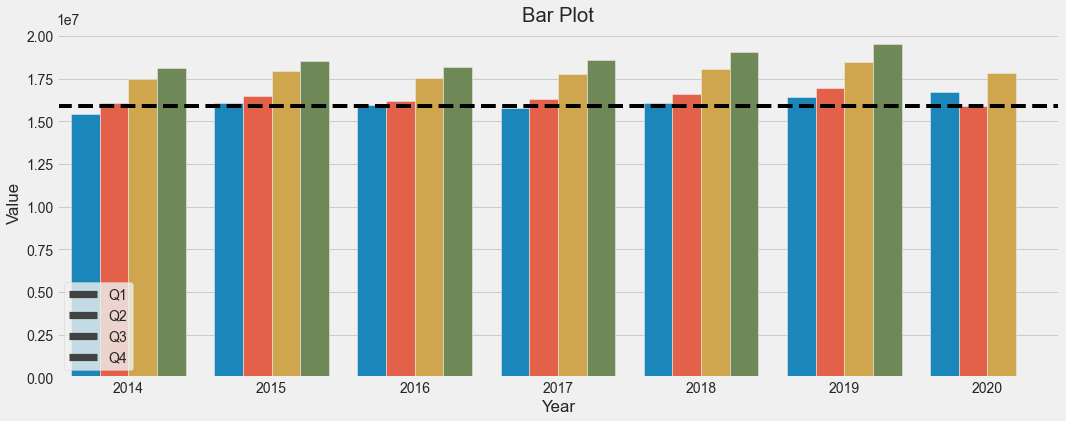

In [76]:
# Reshape the DataFrame with pd.melt()
Nigeria_realGDP_melt = pd.melt(Nigeria_realGDP, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a bar plot
plt.figure(figsize=(16,6))
barplot = sns.barplot(x='Year', y='Value', hue='Quarter', data=Nigeria_realGDP_melt)

# Draw a horizontal line at the value of Q2 in year 2020
q2_2020_value = Nigeria_realGDP.loc[Nigeria_realGDP['Year'] == 2020, 'Q2'].values[0]
plt.axhline(y=q2_2020_value, color='black', linestyle='--')

# Move the legend to lower left and set labels
barplot.legend(loc='lower left', labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.title('Bar Plot')
plt.show()

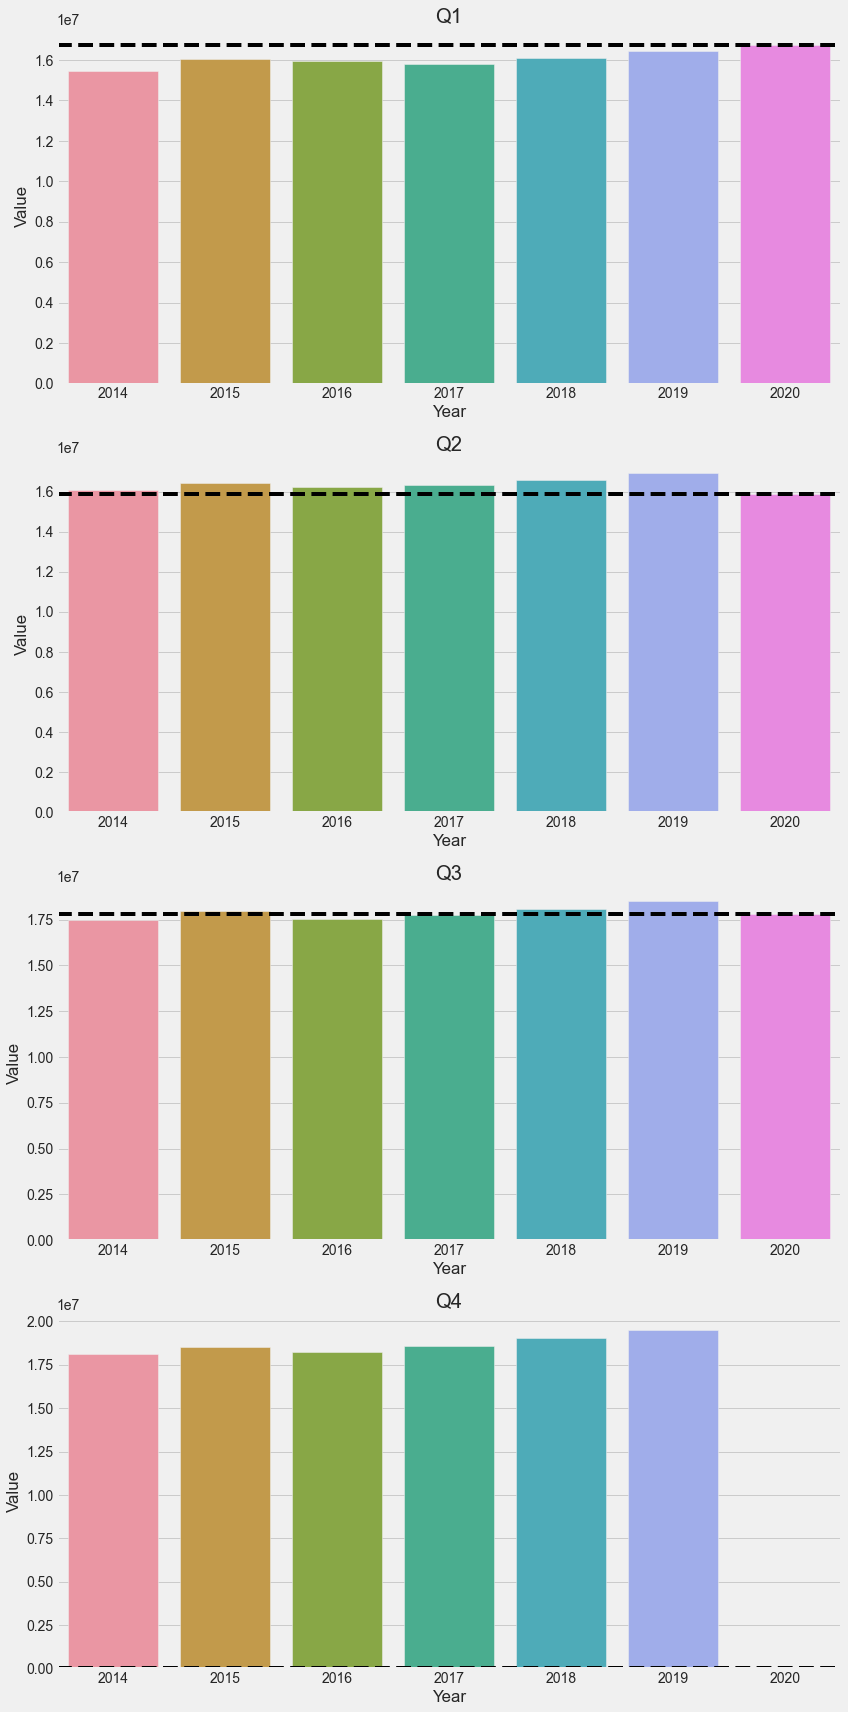

In [77]:
# Reshaping the DataFrame with pd.melt()
Nigeria_realGDP_melt = pd.melt(Nigeria_realGDP, id_vars='Year', var_name='Quarter', value_name='Value')

# Create a figure and axes for 4 subplots (one for each quarter)
fig, axs = plt.subplots(4, figsize=(12,24))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for i, ax in enumerate(axs):
    # Create a bar plot for each quarter
    quarter_data = Nigeria_realGDP_melt[Nigeria_realGDP_melt['Quarter'] == quarters[i]]
    sns.barplot(x='Year', y='Value', data=quarter_data, ax=ax)
    
    # Draw a horizontal line at the value of each quarter in year 2020
    q_2020_value = Nigeria_realGDP.loc[Nigeria_realGDP['Year'] == 2020, quarters[i]].values[0]
    ax.axhline(y=q_2020_value, color='black', linestyle='--')
    
    ax.set_title(quarters[i])

plt.tight_layout()
plt.show()


In [78]:
merged_Nigera_data_top10.head()

region  Population  Overall CCVI Index  Age  Epidemiological  \
states                                                                         
Lagos       South West    13992000                 0.0  0.1              1.0   
FCT      North Central     4865000                 0.3  0.0              0.9   
Rivers     South South     7763000                 0.4  0.5              0.9   
Kaduna      North West     9227000                 0.7  0.1              0.9   
Plateau  North Central     4766000                 0.4  0.5              0.4   

         Fragility  Health System  Population Density  Socio-Economic  \
states                                                                  
Lagos          0.3            0.1                 1.0             0.1   
FCT            0.4            0.6                 0.9             0.6   
Rivers         0.6            0.6                 0.9             0.1   
Kaduna         0.8            0.9                 0.4             0.6   
Plateau        0.8            0.3                 0.3             0.5   

          Transport Availability  Acute IHR States Affected   Cases  \
states                                                                
Lagos                        0.4       0.93           Lagos  104286   
FCT                          0.2       0.79             FCT   29535   
Rivers                       0.1       1.00          Rivers   18112   
Kaduna                       0.4       0.86          Kaduna   11675   
Plateau                      0.3       0.93         Plateau   10365   

         Hospitalized  Discharged  Deaths  
states                                     
Lagos            1143      102372     771  
FCT                 9       29277     249  
Rivers             -3       17960     155  
Kaduna              3       11583      89  
Plateau             4       10286      75